# Unsupervised Revision Questions

## Exercises Topics:

1. Principal Component Analysis

2. Dimensionality Reduction

3. Clustering and GeoSpatial Analysis

4. Recommender Systems

---

## 1. Principal Component Analysis

### Q1:

The most important preprocessing step for our data before any dimensionality reduction may take place is?

* Removing Stop words

* Data Balancing

* Scaling


----

### Q2:

The premise of PCA is that data in some higher number of dimensions can be mapped to some lower number of dimensions, whilst retaining the maximum amount of __________ in the lower dimension.

* Variance

* Eigenvectors

* Eigenvalues





---

### Q3:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

Using Unsupervised Learning Techniques to Perform Market Basket Analysis: Implementing Customer Segmentation Concepts to score a customer based on their behaviors and purchasing data

In [ ]:
# Load the Mall Customer Segmentation Dataset
mall_data = pd.read_csv('https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv')

In [ ]:
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# Selecting the features (Annual Income and Spending Score) for clustering
# Drop the specified columns from the dataset
X = mall_data.drop(['Gender', 'CustomerID'], axis=1)
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X)

Debug the following:

In [ ]:
# Percentage of variance explained by each principal component
explained_variance_ratio = pca.____
cumulative_variance_ratio = np.cmsm(explained_variance_ratio)
print("The first principal components explain " +
      str(np.round(sum(pca.explained_variance_ratio_[:1]),2)*100) + " % of the variance in the data")

The first two principal components explain 89.0 % of the variance in the data


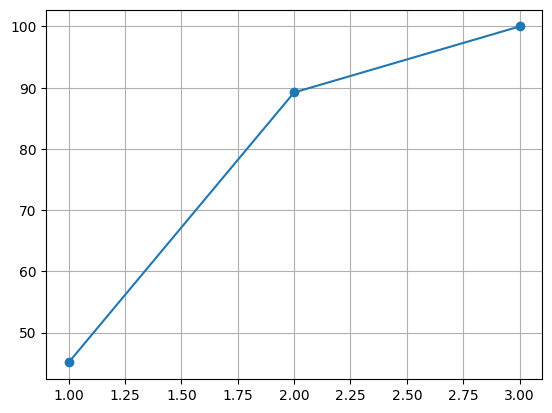

In [ ]:
# Plotting the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio*100, marker='o', linestyle='-')
plt.grid()
plt.show()

---

## 2. Advanced Dimensionality

### Q1:

Eigenvectors and Eigenvalues are computed from the _____________ in order to determine the____________ of the data.

* countvectorizer , variance

* balance, scale

* covariance matrix, principal component


---

### Q2:

Fill in the missing code:

Possible Answers:

* T-sne, Chebyshev

* MDS, Manhatten

* MDS, 'euclidean'

In [ ]:
# Importing MDS from sklearn
from sklearn.manifold import _____

# MDS and its parameters
MDS = MDS(n_compomnants=2,
          n_init=4,
          max_iter=200,
          n_jobs=-1,
          random_state=42,
          dissimilarity=______)

---

### Q3:

T-distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique commonly used for visualizing _________________ , typically 2D or 3D.
* low-dimensional data in a higher-dimensional space

* high-dimensional data in a lower-dimensional space

* probability distribution


---

## 3. Clustering and GeoSpatial Analysis

### Q1:

In hierarchical clustering, we have to set the number of clusters (K) beforehand

* True
* False

### Q2:

![](https://raw.githubusercontent.com/claudiaewilson/resources/main/dendrogram_q.png)

What is an appropriate number of clusters from this dendrogram?

* 2
* 3
* 4

### Q3:

What is the common measure used in the ‘Elbow method’ of determining K with K-means clustering?

* Euclidean distance

* Within-cluster sum of squares

* Complete distance


### Q4:

What is the name of the column that needs to be specified as holding geospatial data in a GeoDataFrame?

* geography

* geospatial_data

* geometry


### Q5:

Given this function for calculating WCSS, find the optimal number of clusters between 2 and 20 for the Mall Data, using the Annual Income and Spending Score columns (hint: plot an elbow graph)

In [ ]:
# Manually implement the WCSS
def within_cluster_variation(df, label_col='label'):
    centroids = df.groupby(label_col).mean()
    out = 0
    for label, point in centroids.iterrows():
        df_features = df[df[label_col] == label].drop(label_col, axis=1)
        out += (df_features - point).pow(2).sum(axis=1).sum()
    return out

In [ ]:
# create scaler object
scaler = _________()

# scale the data
X_scaled = scaler.__________(X)

In [ ]:
# let's try everything between 2 and 20 clusters
n_clusters = np.arange(2, 21)

# store errors for each value of k
errors = []

# for i between 2 and 20
for k in _________:
    # perform k-means clustering
    km = KMeans(n_clusters=_, random_state=42)
    __._____(X_scaled)

    # measure WCSS

    y_preds = km._______(X_scaled)
    X['cluster_label'] = y_preds
    errors.append(_____________(X,'cluster_label'))

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(n_clusters, errors)
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.show()

---

### Q6:

Using the optimal number of clusters identified from the Elbow diagram, list the number of data points contained in each cluster

In [ ]:
km_optimal = KMeans(n_clusters=_, random_state=42)
km_optimal.___(X_scaled)

y_preds =
X['cluster_label'] = y_preds
X.head()

In [ ]:
# How can we find the number of data points per cluster?

---

### Bonus:

Use the already-prepared US Census data and geographical data to create 3 clusters using K-means. Plot this data, and identify which cluster the majority of Alaska falls under? (Fill in the missing code)

* 0
* 1
* 2

In [ ]:
import geopandas as gpd

# Import US Census data
df_us = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/acs2015_county_data.csv', encoding='utf-8').dropna()
gdf = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json')

# Isolate work data
df_us = df_us[['CensusId', 'WorkAtHome','MeanCommute','Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',	'FamilyWork',	'Unemployment']]


# Prepare data
labels = ['CensusId', 'State', 'County']
features = [col for col in df_us.columns if col not in labels]

# Scale our features
scaler = StandardScaler()
df_us[features] = df_us[features].astype('float64')
df_us_scaled = scaler.fit_transform(df_us[features])


In [ ]:
km_us = KMeans(n_clusters=_, random_state=42)
km_us.fit(_______)

y_preds = km_us.predict(_______)
df_us['cluster_label'] = y_preds

In [ ]:
# merge our two dataframes, so we have our geometry data with all the other US Census data
gdf['id'] = gdf['id'].astype('int64')
df_merged = ....

# delete the 'id' and 'names' columns
...

# convert to a GeoDataFrame, specifying which column we wish to use for the geometry info
df_merged = ...

In [ ]:
# plot our graph!

...

plt.show()

## 4. Recommender Systems

### Q1:

A content-based recommender system uses…

* Information about users such as their age, gender, income, etc.

* Information about attributes of the items themselves.

* Information about users in terms of their similarity to other users’ preferences



### Q2:

Which of the following is true of the cosine similarity?

* The closer the value to 1, the more similar two vectors are

* It uses the euclidean distance between two points

* The diagonals of a cosine similarity matrix are always 0



### Q3:

What is the cold start problem in recommender systems?

* When our recommendation service has trouble recruiting users when first launched

* When a new user uses the recommendation service, but has no historical rating data for our algorithm to base recommendations off of

* When our recommendation algorithm only recommends Christmas movies



-----

---

## ANSWERS

## 1. Principal Component Analysis

### Q1:

The most important preprocessing step for our data before any dimensionality reduction may take place is?

* Removing Stop words

* Data Balancing

* **Scaling**


### Q2:

The most important preprocessing step for our data before any dimensionality reduction may take place is?

* Removing Stop words

* Data Balancing

* **Scaling**


### Q3:

In [ ]:
# Percentage of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("The first principal component explains " +
      str(np.round(sum(pca.explained_variance_ratio_[:1]),2)*100) + " % of the variance in the data")

In [ ]:
# Plotting the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio*100, marker='o', linestyle='-')
plt.title('Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance percentage')
plt.grid()
plt.show()

## 2. Advanced Dimensionality

### Q1:

Eigenvectors and Eigenvalues are computed from the **Covariance matrix** in order to determine the **principal component** of the data.

* countvectorizer , variance

* balance, scale

* **covariance matrix, principal component**

![](https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-pca-diagram.png)

### Q2:

Possible Answers:

* T-sne, Chebyshev

* MDS, Manhatten

* **MDS, 'euclidean'**

In [ ]:
# Importing MDS from sklearn
from sklearn.manifold import MDS

# MDS and its parameters
MDS = MDS(n_compomnants=2,
          n_init=4,
          max_iter=200,
          n_jobs=-1,
          random_state=42,
          dissimilarity='euclidean')

### Q3:

T-distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique commonly used for visualizing _________________ , typically 2D or 3D.
* low-dimensional data in a higher-dimensional space

* **high-dimensional data in a lower-dimensional space**

* probability distribution

## 3. Clustering and GeoSpatial Analysis

### Q1:

In hierarchical clustering, we have to set the number of clusters (K) beforehand

* True
* **False**

### Q2:

What is an appropriate number of clusters from this dendrogram?

* 2
* 3
* **4**

![](https://raw.githubusercontent.com/claudiaewilson/resources/main/dendrogram_a.png)

### Q3:

What is the common measure used in the ‘Elbow method’ of determining K with K-means clustering?

* Euclidean distance

* **Within-cluster sum of squares**

* Complete distance

### Q4:

What is the name of the column that needs to be specified as holding geospatial data in a GeoDataFrame?

* geography

* geospatial_data

* **geometry**

![](https://geopandas.org/en/stable/_images/dataframe.svg)

### Q5:

In [ ]:
# Manually implement the WCSS
def within_cluster_variation(df, label_col='label'):
    centroids = df.groupby(label_col).mean()
    out = 0
    for label, point in centroids.iterrows():
        df_features = df[df[label_col] == label].drop(label_col, axis=1)
        out += (df_features - point).pow(2).sum(axis=1).sum()
    return out

In [ ]:
# create scaler object
scaler = StandardScaler()

# scale the data
X_scaled = scaler.fit_transform(X)

In [ ]:
# let's try everything between 2 and 20 clusters
n_clusters = np.arange(2, 21)

# store errors for each value of k
errors = []

# for i between 2 and 20
for k in n_clusters:
    # perform k-means clustering
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)

    # measure WCSS

    y_preds = km.predict(X_scaled)
    X['cluster_label'] = y_preds
    errors.append(within_cluster_variation(X,'cluster_label'))

In [ ]:
plt.figure(figsize=(6,4))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Value of k')
plt.scatter(n_clusters, errors)
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.show()

### Q6:

In [ ]:
km_optimal = KMeans(n_clusters=5, random_state=42)
km_optimal.fit(X_scaled)


y_preds = km_optimal.predict(X_scaled)
X['cluster_label'] = y_preds
X.head()

In [ ]:
df2 = X.groupby(['cluster_label']).count()
df2

In [ ]:
# We can also look at the size of each cluster in graphical form!
X.groupby(
    'cluster_label').count().reset_index().plot(kind='bar',
                                              x='cluster_label',
                                              figsize=(6,3),
                                              title='Number of data points per Cluster')
plt.xlabel("Clusters")
plt.ylabel("# of data points")
plt.show()

### Bonus:

In [ ]:
import geopandas as gpd

# Import US Census data
df_us = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/acs2015_county_data.csv', encoding='utf-8').dropna()
gdf = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json')

# Isolate work data
df_us = df_us[['CensusId', 'WorkAtHome','MeanCommute','Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',	'FamilyWork',	'Unemployment']]


# Prepare data
labels = ['CensusId', 'State', 'County']
features = [col for col in df_us.columns if col not in labels]

# Scale our features
scaler = StandardScaler()
df_us[features] = df_us[features].astype('float64')
df_us_scaled = scaler.fit_transform(df_us[features])


In [ ]:
km_us = KMeans(n_clusters=3, random_state=42)
km_us.fit(df_us_scaled)

y_preds = km_us.predict(df_us_scaled)
df_us['cluster_label'] = y_preds

In [ ]:
# merge our two dataframes, so we have our geometry data with all the other US Census data
gdf['id'] = gdf['id'].astype('int64')
df_merged = pd.merge(left=df_us, right=gdf, how='inner', left_on='CensusId', right_on='id')

del df_merged['id']
del df_merged['name']

# convert to a GeoDataFrame, specifying which column we wish to use for the geometry info
df_merged = gpd.GeoDataFrame(df_merged, geometry='geometry')

In [ ]:
df_merged.plot(column='cluster_label',
        cmap='tab20c',
        figsize=(6,10),
        categorical=True,
        legend=True)
plt.show()

Majority of Alaska falls under cluster 0! (If you're not sure where Alaska is, have a quick Google of a map of the US - it's the bit of land in the top left of the plot!)

## 4. Recommender Systems

### Q1:

A content-based recommender system uses…

* Information about users such as their age, gender, income, etc.

* **Information about attributes of the items themselves.**

* Information about users in terms of their similarity to other users’ preferences


### Q2:

Which of the following is true of the cosine similarity?

* **The closer the value to 1, the more similar two vectors are**

* It uses the euclidean distance between two points

* The diagonals of a cosine similarity matrix are always 0

### Q3:

What is the cold start problem in recommender systems?

* When our recommendation service has trouble recruiting users when first launched

* **When a new user uses the recommendation service, but has no historical rating data for our algorithm to base recommendations off of**

* When our recommendation algorithm only recommends Christmas movies